In [2]:
import numpy as np
from connect_four import Game, GameType 

In [3]:
game_init = np.array(
    [
        [2, 2, 2, 1, 0, 1, 0],
        [2, 1, 1, 1, 0, 2, 0],
        [1, 2, 2, 2, 0, 1, 0],
        [2, 1, 1, 1, 0, 2, 0],
        [1, 1, 1, 2, 0, 2, 0],
        [2, 2, 1, 2, 0, 1, 0],
    ]
)

In [4]:
game = Game(game_state=game_init, game_type=GameType.MCTS_VS_RANDOM, mcts_maxiter=1000)

Running the MCTS for several "epochs" 
The tree nodes store the state of the game when they are created. This states are the result from (first) the action chosen to create the node plus (second) the random action of player 2. This node states are frozen and kept untouched. This means we have a limited view of all the possible outcomes.  

We run the MCTS for sevral "epochs" before choosing an action to take. Each epoch consists of a single independent run of the tree search algorithm. This means that we will have as many action-value pairs as epochs (for the root node). We take the average of the q-values to select an action.  

In [ ]:
from typing import Dict


class QValuesDict(dict):
    """This keeps a running average of q-values returned by mcts"""

    def __init__(self, *args, **kwargs) -> None:
        self._updates = 0
        return super().__init__(*args, **kwargs)

    def update(self, new: Dict[int, float]) -> None:
        assert not set(new.keys()) - set(self.keys())

        for key in new:
            # Update the running average of each action
            # This is: \bar{x}_{N+1} = 1 / (N + 1) * (N * \bar{x}_N + x_{N + 1}) 
            # Where \bar{x}_N is the mean value of x given N updates
            self[key] = 1 / (self._updates + 1) * (self._updates * self[key] + new[key])

        self._updates += 1


def select_best_action_dope(self, epochs: int = 10) -> int:
    print("Running tree search to choose action ...")
    qvalues = QValuesDict({a: 0.0 for a in range(self.game_board.ncols)})
    for e in range(epochs):
        print(f"\tRunning epoch {e} to find best action ...")
        qvalues.update(self.mcts.run(game_state=self.game_board.snapshot()))
    print(f"Qvalues: {qvalues}")
    print(f"Choosing {int(max(qvalues, key=qvalues.get))}")
    return int(max(qvalues, key=qvalues.get))

In [10]:
Game.select_best_action = select_best_action_dope

Running tree search to choose action ...
	Running epoch 0 to find best action ...
	Running epoch 1 to find best action ...
	Running epoch 2 to find best action ...
	Running epoch 3 to find best action ...
	Running epoch 4 to find best action ...
Qvalues: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.749073716484492, 5: 0.0, 6: 0.4250930981608765}
Choosing 4


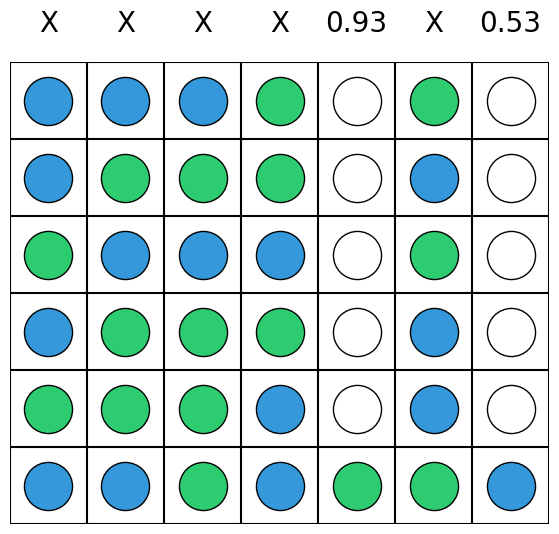

Running tree search to choose action ...
	Running epoch 0 to find best action ...
	Running epoch 1 to find best action ...
	Running epoch 2 to find best action ...
	Running epoch 3 to find best action ...
	Running epoch 4 to find best action ...
Qvalues: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.11618512705032712, 5: 0.0, 6: 0.7686399705431535}
Choosing 6


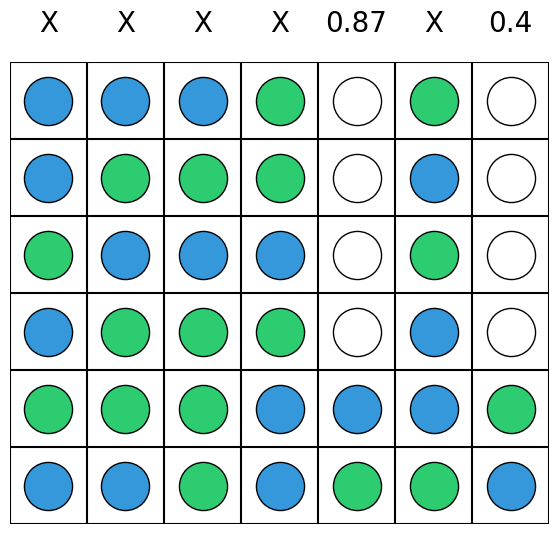

Running tree search to choose action ...
	Running epoch 0 to find best action ...
	Running epoch 1 to find best action ...
	Running epoch 2 to find best action ...
	Running epoch 3 to find best action ...
	Running epoch 4 to find best action ...
Qvalues: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 1.0, 5: 0.0, 6: -1.0}
Choosing 4


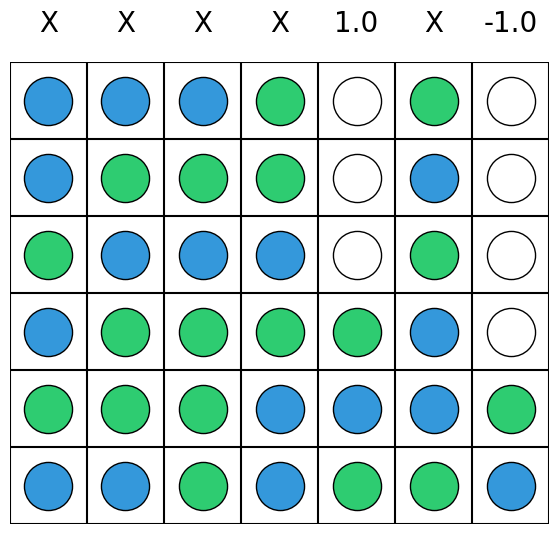

The winner of the game is: 1


In [11]:
game.play()